# 质量因子

## 基本逻辑

质量因子一般分为盈利能力(Profitability)和经营效率(Efficiency)两大类. 盈利能力比率测量的是企业从收入, 资产以及股东权益中产生利润和现金流的能力. 经营效率比率测量的是企业利用其资产产生收入以及管理负债的效率. 一个公司的盈利能力和经营效率越高, 则相对于同类企业其更受投资者青睐.

同价值因子类似, 质量因子也多以比率的形式构建, 盈利能力比率的分子多为衡量盈利的指标, 比如净利润, 毛利等, 而分母多为营收, 资产, 股东权益的账面价值, 这与价值因子使用市场价值或者企业价值不同.


## 质量因子库

In [1]:
# coding=utf-8
import time
import sys
import os
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
sys.path.append("C:\\Users\\hushuntai\\svn\\python")

from IPython.display import display
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdate
from tqdm import tqdm_notebook

pd.set_option("max_rows", None, "max_colwidth", 1000)
FactorInfo = pd.read_csv(".\\csv\\质量因子.csv", header=0, index_col=0, encoding="utf-8")
display(FactorInfo)

,因子描述,排序方向,数据类型
因子名称,,,
GrossMargin,(营业收入_TTM - 营业成本_TTM) / 营业收入_TTM,降序,double
Gross2SalesExpenses,(营业收入_TTM - 营业成本_TTM) / 销售费用_TTM,降序,double
OperatingMargin,营业利润_TTM / 营业收入_TTM,降序,double
NetMargin,净利润_TTM / 营业收入_TTM,降序,double
OCF2OP,经营活动产生的现金流量净额_TTM / 营业利润_TTM,降序,double
ThreeCosts2Sales_TTM,(销售费用_TTM + 管理费用_TTM + 财务费用_TTM) / 营业收入_TTM,升序,double
ROEStability_5Y,过去5年的 ROE_TTM 的标准差 / 过去5年的 ROE_TTM 的均值,升序,double
ROE_Chg,ROE_TTM / 去年同期的 ROE_TTM - 1,降序,double
ROAStability_5Y,过去5年的 ROA_TTM 的标准差 / 过去5年的 ROA_TTM 的均值,升序,double


说明：
* 后缀 LR: 表示使用当前时点可见的最近财报数据计算因子值；
* 后缀 TTM: 表示使用当前时点可见的所有财报数据计算出来的滚动四个季度值，假设当前可见的最新财报是一季报，那么，滚动四季度值 = 本年一季报值 + 去年年报值 - 去年一季报值;
* 后缀 Gr: 表示计算增长率


**ROE(Return on Equity)**

ROE 是将盈利能力, 经营效率以及杠杆等综合考虑的指标, 利用杜邦分析对其分解:
$$
ROE=\frac{净利润}{所有者权益} = \frac{净利润}{主营业务收入}\times\frac{主营业务收入}{总资产}\times\frac{总资产}{所有者权益} = 净利润率\times资产周转率\times杠杆率
$$

**ROA(Return on Asset)**

ROA 可以看做去杠杆化后的企业盈利能力. ROA 在比较杠杆率差别较大的企业间比较有效.


单独使用价值因子进行选股容易陷入价值陷阱, 可以考虑将质量因子和价值因子结合起来使用. 



## 因子测试

由于大多数质量因子涉及公司的财务数据, 而财务报表每个季度发布一次, 季度内因子值的变化仅仅依赖于股票价格的变动, 所以因子的预测期不宜过短, 这里以月度为预测期. 

下面从 IC, Fama-MacBeth 回归, 行业分布以及因子间相关性对质量类因子进行测试:

==========历史回测==========
1. 初始化耗时 : 3.55
2. 循环计算

100%|████████████████████████████████████████| 132/132 [03:37<00:00,  1.65s/it]


耗时 : 217.51
3. 结果生成耗时 : 0.71
总耗时 : 221.78


,平均值,标准差,最小值,最大值,IC_IR,t统计量,平均股票数,IC×Sqrt(N),有效期数
Asset_Gr,-0.72%,8.48%,-29.59%,23.69%,-0.0854,-0.98,2070.34,-0.33,131
CurAsset_Gr,-0.38%,6.19%,-24.51%,18.17%,-0.0611,-0.70,2035.94,-0.17,131
CurDebt_Gr,-0.72%,6.32%,-17.60%,16.00%,-0.1147,-1.31,2035.92,-0.33,131
CurrentRatio,0.27%,13.21%,-38.67%,29.07%,0.0202,0.23,2209.93,0.13,131
Debt_Gr,-0.46%,6.63%,-16.90%,17.40%,-0.0690,-0.79,2068.23,-0.21,131
EPS_FY0_CV,2.40%,8.65%,-22.10%,20.31%,0.2773,3.17,1199.98,0.83,131
Equity_Gr,-1.41%,9.62%,-32.33%,26.90%,-0.1461,-1.67,2070.12,-0.64,131
FixAsset_Gr,-0.24%,7.14%,-15.71%,17.21%,-0.0342,-0.39,2064.02,-0.11,131
Gross2SalesExpenses,-1.17%,7.88%,-26.20%,19.02%,-0.1485,-1.70,1964.43,-0.52,131
GrossMargin,0.73%,9.61%,-21.53%,21.43%,0.0764,0.87,2042.23,0.33,131

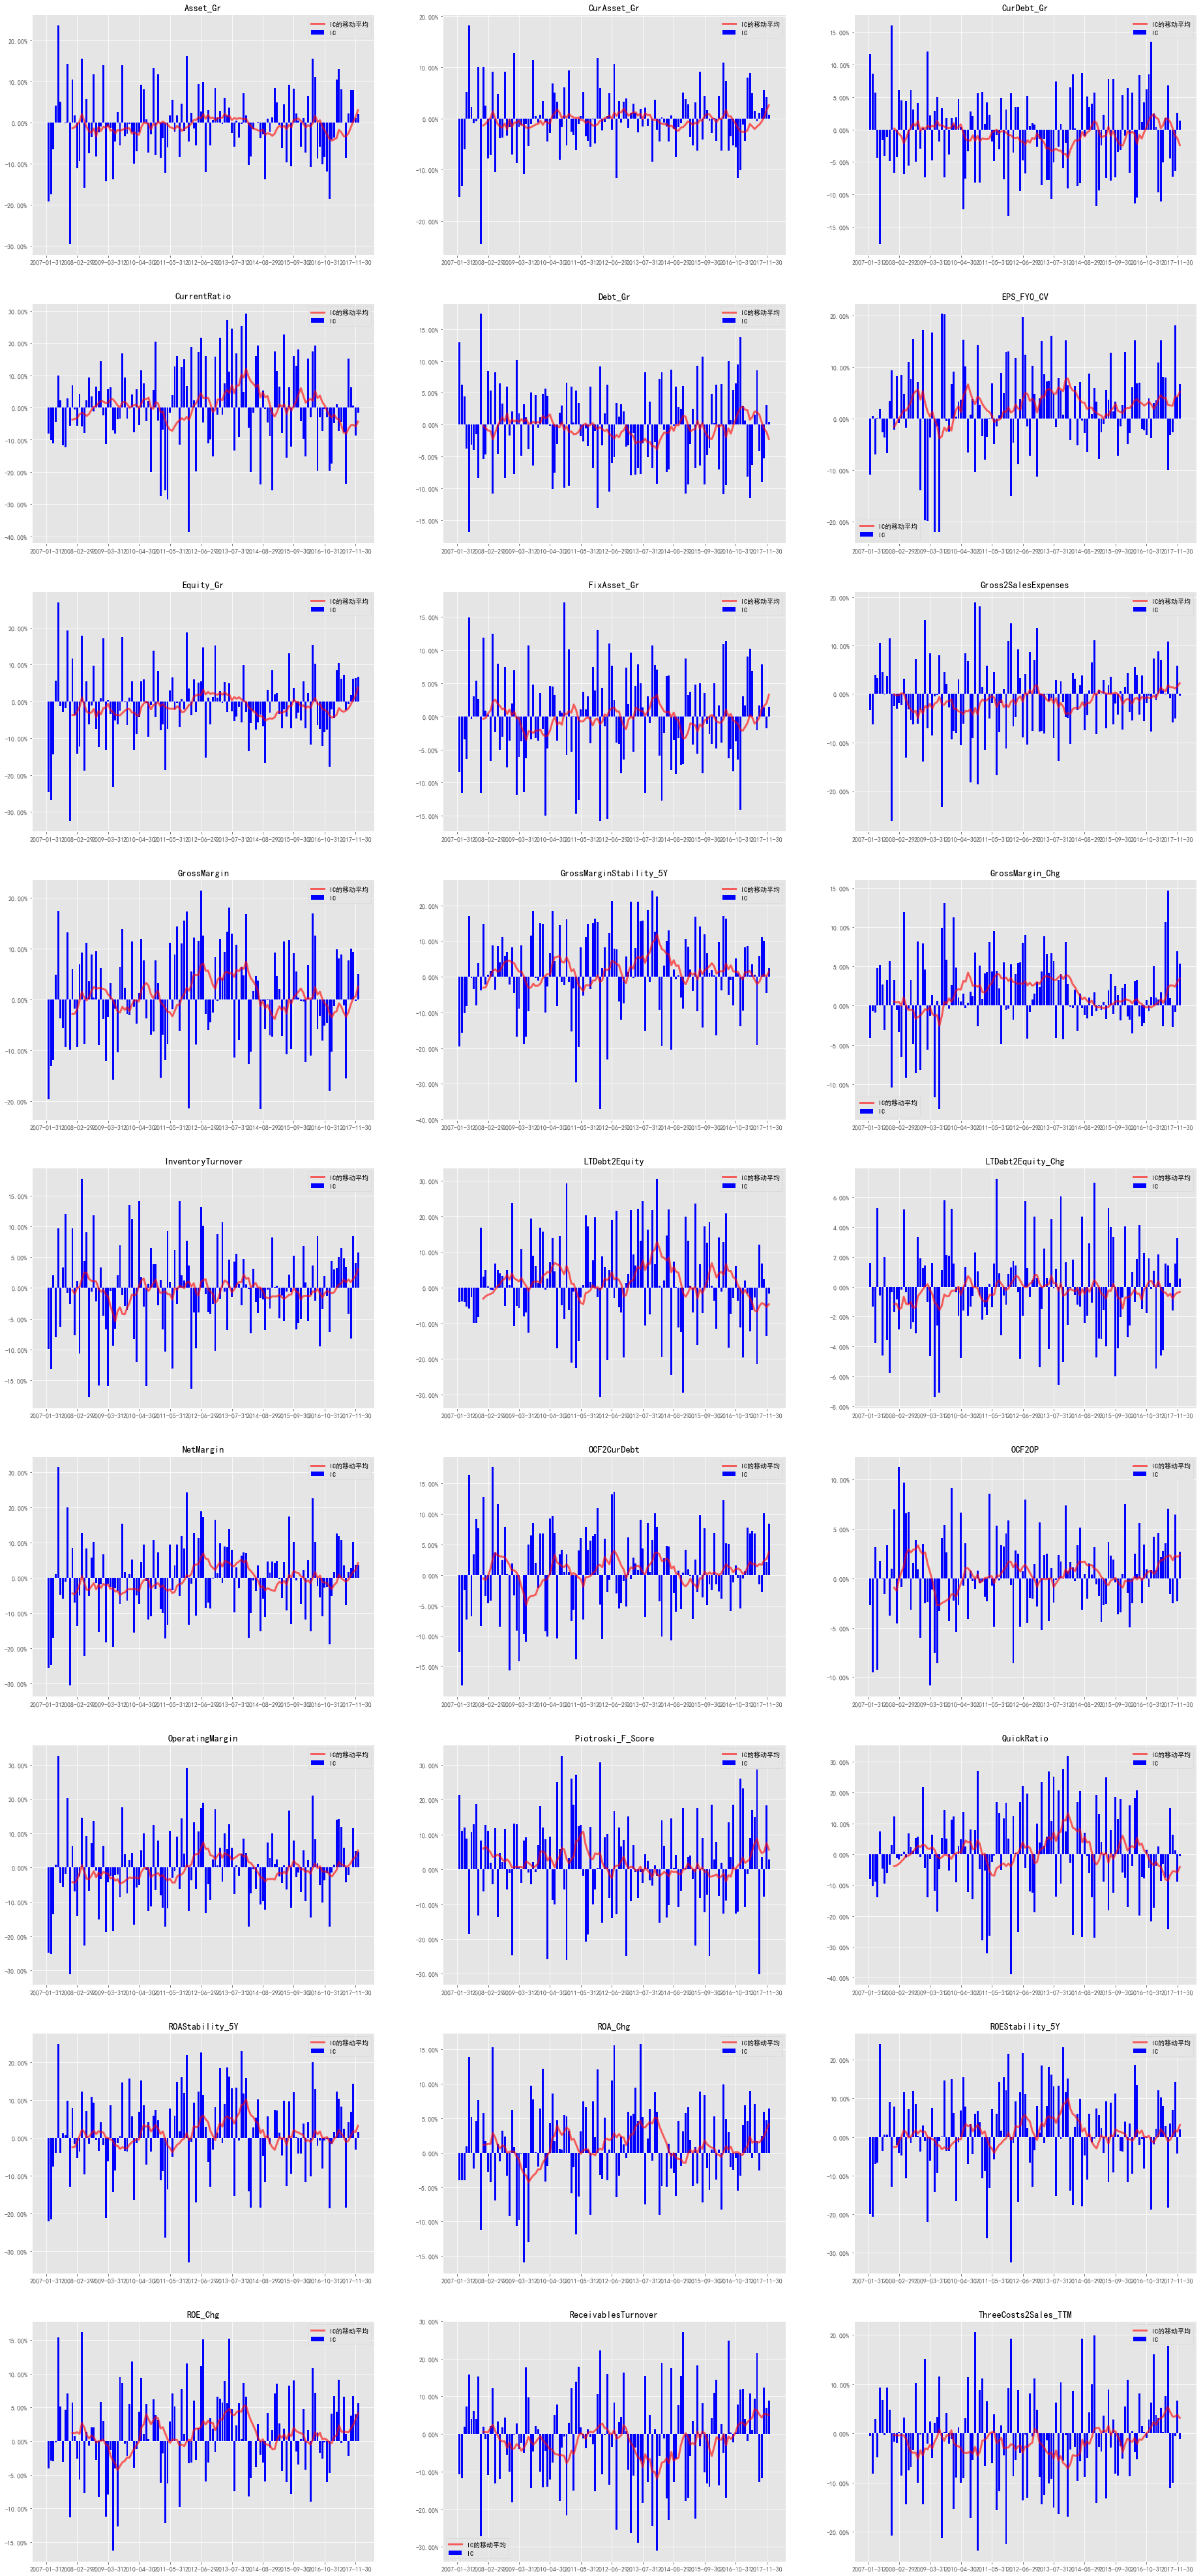
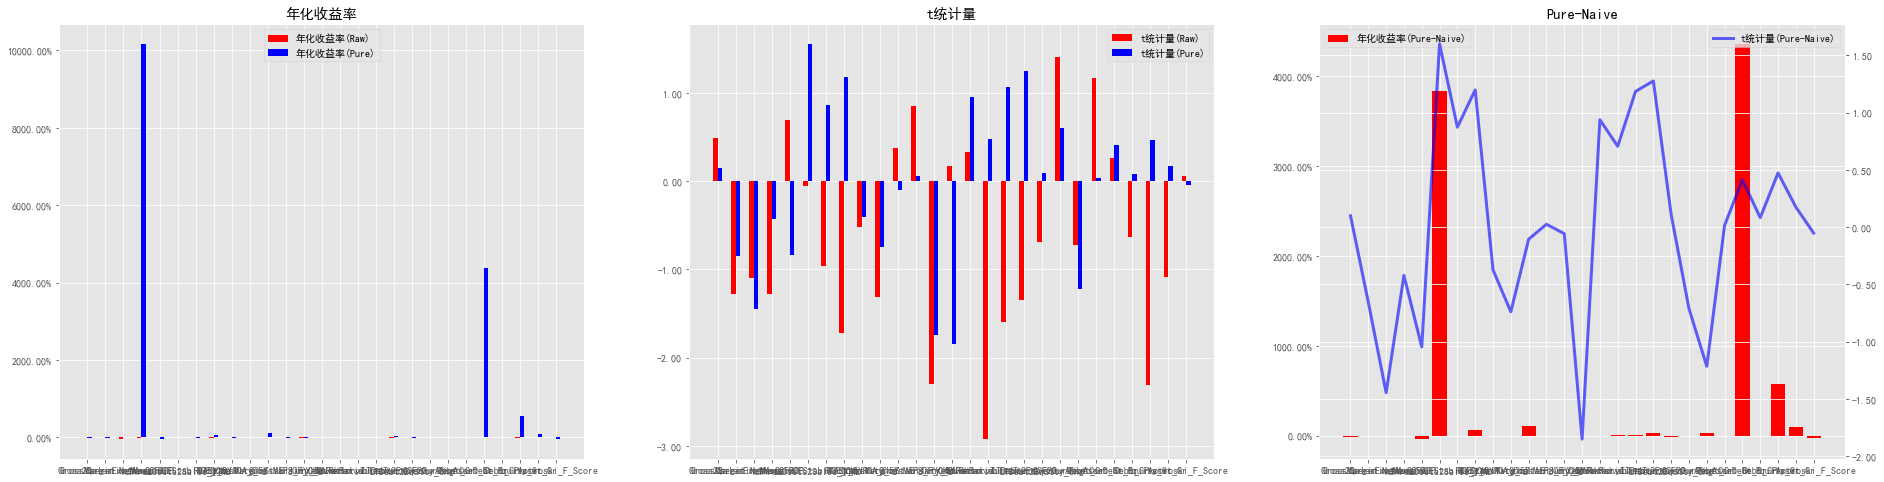
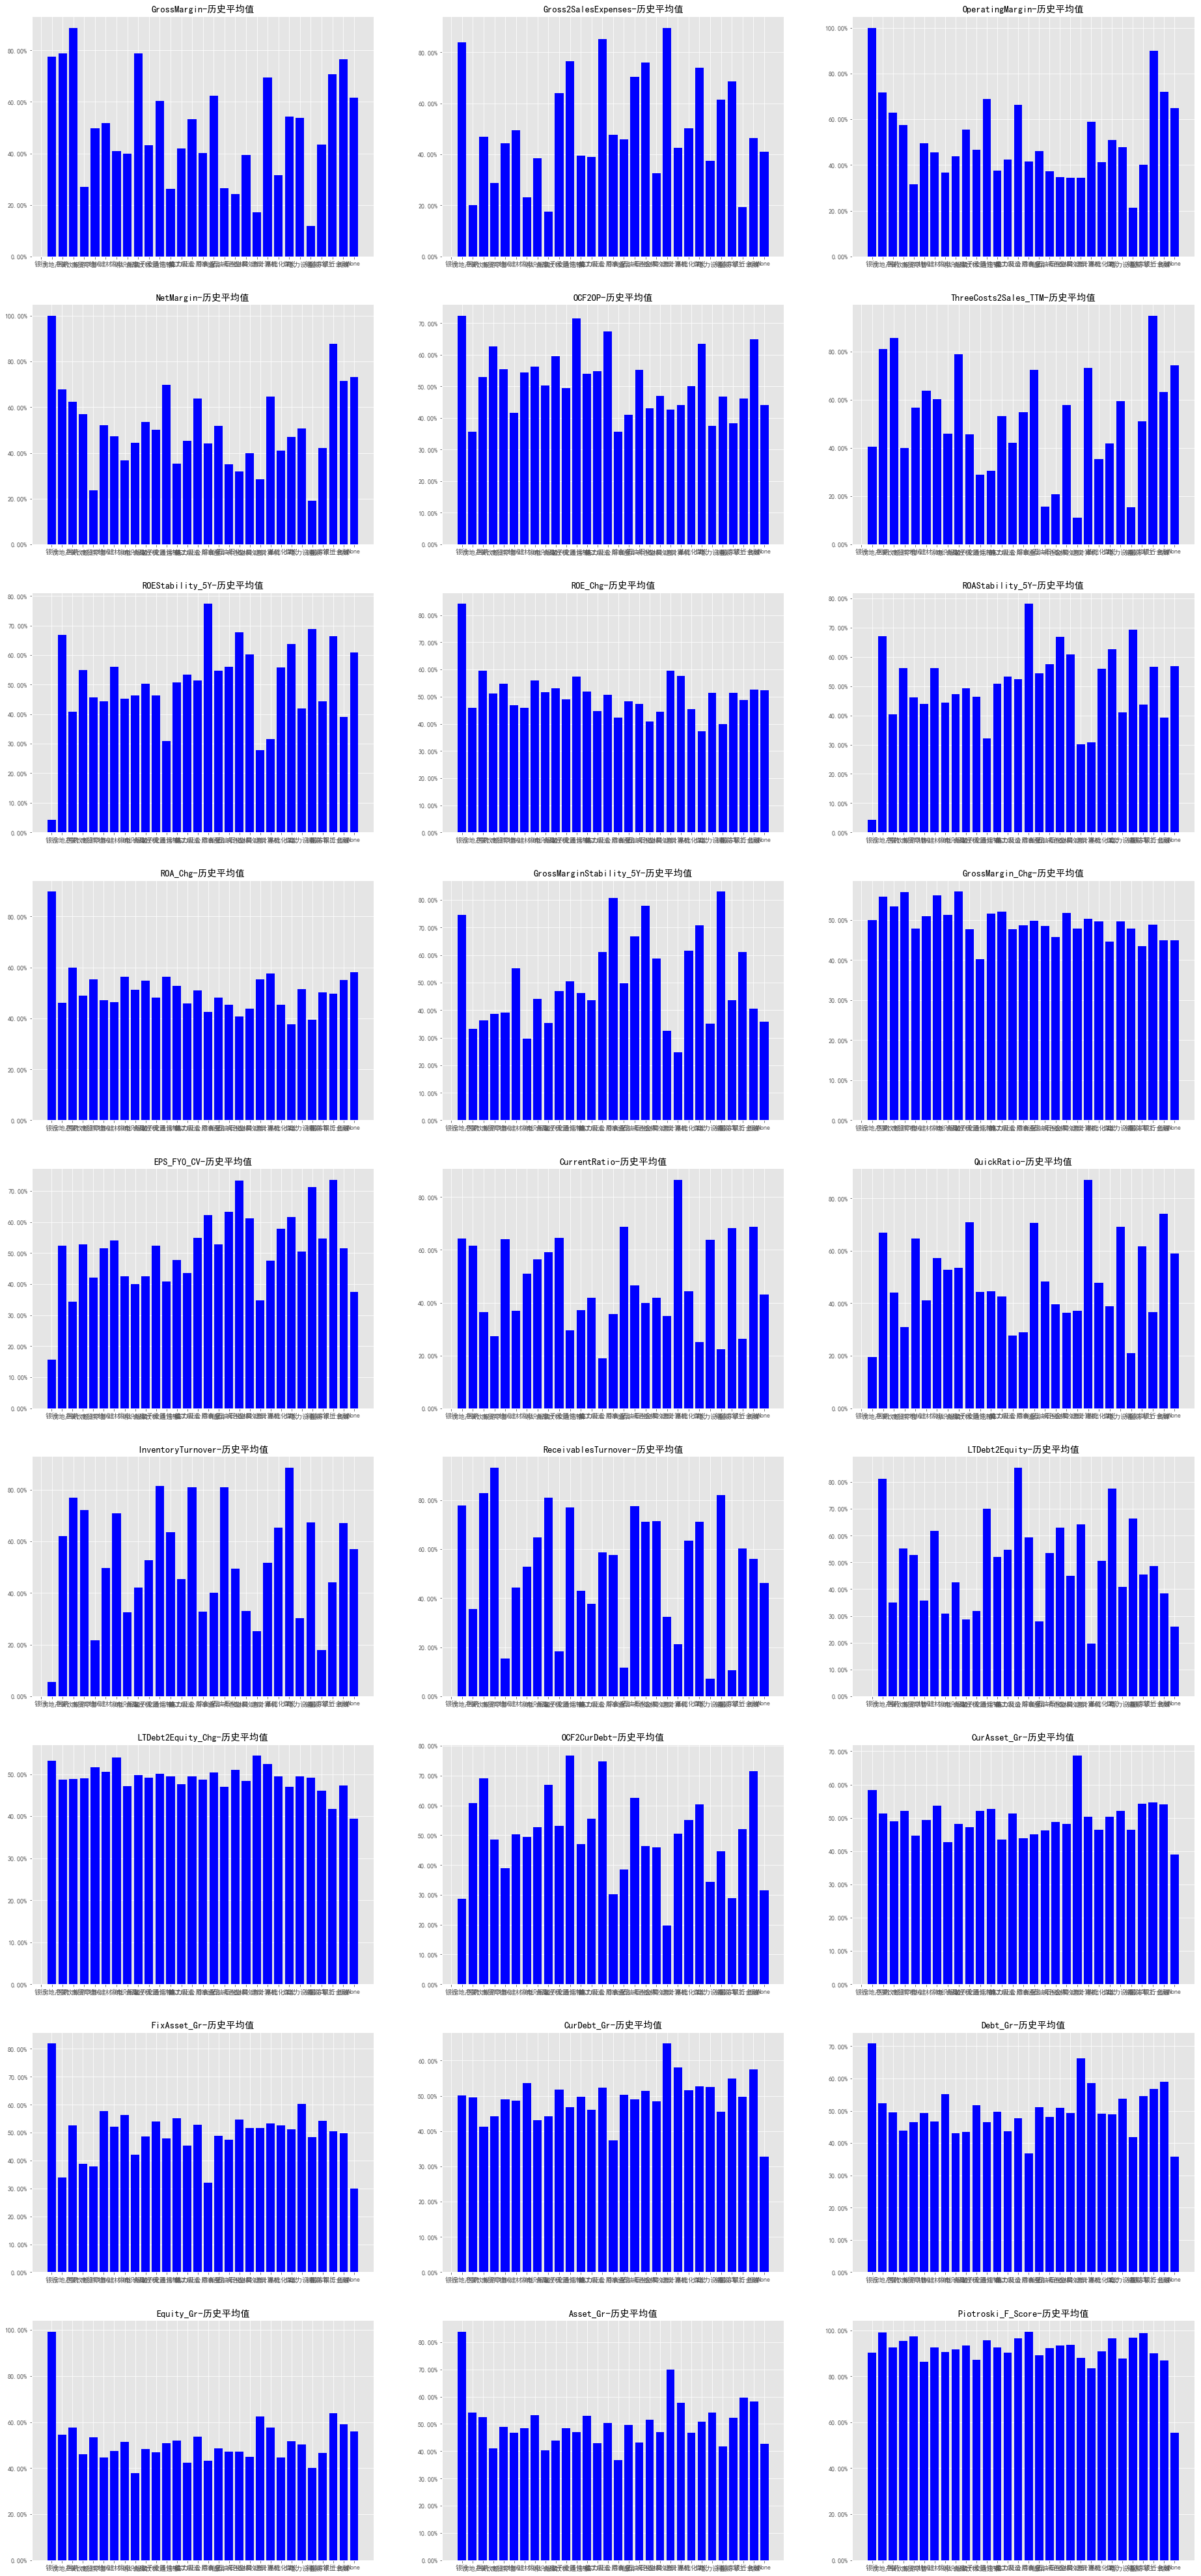

In [2]:
if __name__=='__main__':
    import matplotlib
    matplotlib.pyplot.ioff()
    import QuantStudio.api as QS
    
    # 创建因子库
    HDB = QS.FactorDB.HDF5DB()
    HDB.connect()
    
    # 创建自定义因子表
    MainFT = QS.FactorDB.CustomFT("MainFT")
    ElementaryFT = HDB.getTable("ElementaryFactor")
    DTs = ElementaryFT.getDateTime(ifactor_name="复权收盘价", start_dt=dt.datetime(2007, 1, 1), end_dt=dt.datetime(2018, 1, 1))
    MonthLastDTs = QS.Tools.DateTime.getMonthLastDateTime(DTs)
    FactorNames = FactorInfo.index.tolist()
    MainFT.addFactors(factor_table=ElementaryFT, factor_names=["复权收盘价", "中信行业", "是否在市"], args={})
    ValueFT = HDB.getTable("StyleQualityFactor")
    Mask = (ElementaryFT.getFactor("是否在市")==1)
    Factors = [QS.FactorDB.FactorTools.standardizeZScore(ValueFT.getFactor(iFactorName), mask=Mask, factor_name=iFactorName) for iFactorName in ValueFT.FactorNames]# 截面标准化处理
    MainFT.addFactors(factor_list=Factors)
    MainFT.setDateTime(MonthLastDTs)
    MainFT.setID(ElementaryFT.getID(ifactor_name="复权收盘价"))
    
    # 创建回测模型
    Model = QS.BackTest.BackTestModel()
    # --------因子测试模块--------
    # IC 测试
    iModule = QS.BackTest.SectionFactor.IC(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["排序方向"] = FactorInfo["排序方向"].loc[FactorNames].to_dict()
    iModule["价格因子"] = "复权收盘价"
    iModule["计算时点"] = MonthLastDTs
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    # Fama-MacBeth 回归
    iModule = QS.BackTest.SectionFactor.FamaMacBethRegression(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["价格因子"] = "复权收盘价"
    iModule["计算时点"] = MonthLastDTs
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    # 因子值的行业分布
    iModule = QS.BackTest.SectionFactor.IndustryDistribution(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["行业因子"] = "中信行业"
    iModule["计算时点"] = MonthLastDTs
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    # 因子相关性
    iModule = QS.BackTest.SectionFactor.SectionCorrelation(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["排序方向"] = FactorInfo["排序方向"].loc[FactorNames].to_dict()
    iModule["计算时点"] = MonthLastDTs
    iModule["相关性算法"] = ["spearman"]
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    
    # 运行模型
    TestDateTimes = MainFT.getDateTime()
    Model.run(dts=TestDateTimes)
    
    # 查看结果
    display(Model)

从 IC 来看, 质量因子的选股能力不是很强; 从因子值的行业分布来看, 价值因子在行业上的分布不均匀, 这说明质量因子有一定的行业偏离, 下面我们测试其行业调整的 IC:

==========历史回测==========
1. 初始化耗时 : 2.84
2. 循环计算

100%|████████████████████████████████████████| 132/132 [02:43<00:00,  1.24s/it]


耗时 : 163.89
3. 结果生成耗时 : 0.10
总耗时 : 166.83


,平均值,标准差,最小值,最大值,IC_IR,t统计量,平均股票数,IC×Sqrt(N),有效期数
Asset_Gr,-0.25%,7.69%,-27.06%,22.98%,-0.0322,-0.37,2070.34,-0.11,131
CurAsset_Gr,-0.22%,5.66%,-23.14%,17.91%,-0.0383,-0.44,2035.94,-0.10,131
CurDebt_Gr,-0.82%,5.49%,-18.00%,15.90%,-0.1498,-1.71,2035.92,-0.37,131
CurrentRatio,-0.47%,8.45%,-27.61%,15.69%,-0.0553,-0.63,2209.93,-0.22,131
Debt_Gr,-0.74%,5.62%,-16.58%,16.42%,-0.1323,-1.51,2068.23,-0.34,131
EPS_FY0_CV,2.12%,6.61%,-16.88%,15.65%,0.3216,3.68,1199.98,0.74,131
Equity_Gr,-1.10%,8.87%,-28.60%,24.19%,-0.1235,-1.41,2070.12,-0.50,131
FixAsset_Gr,-0.16%,5.94%,-14.60%,16.18%,-0.0263,-0.30,2064.02,-0.07,131
Gross2SalesExpenses,-0.58%,4.67%,-15.10%,9.79%,-0.1231,-1.41,1964.43,-0.25,131
GrossMargin,0.53%,6.93%,-15.82%,13.24%,0.0769,0.88,2042.23,0.24,131

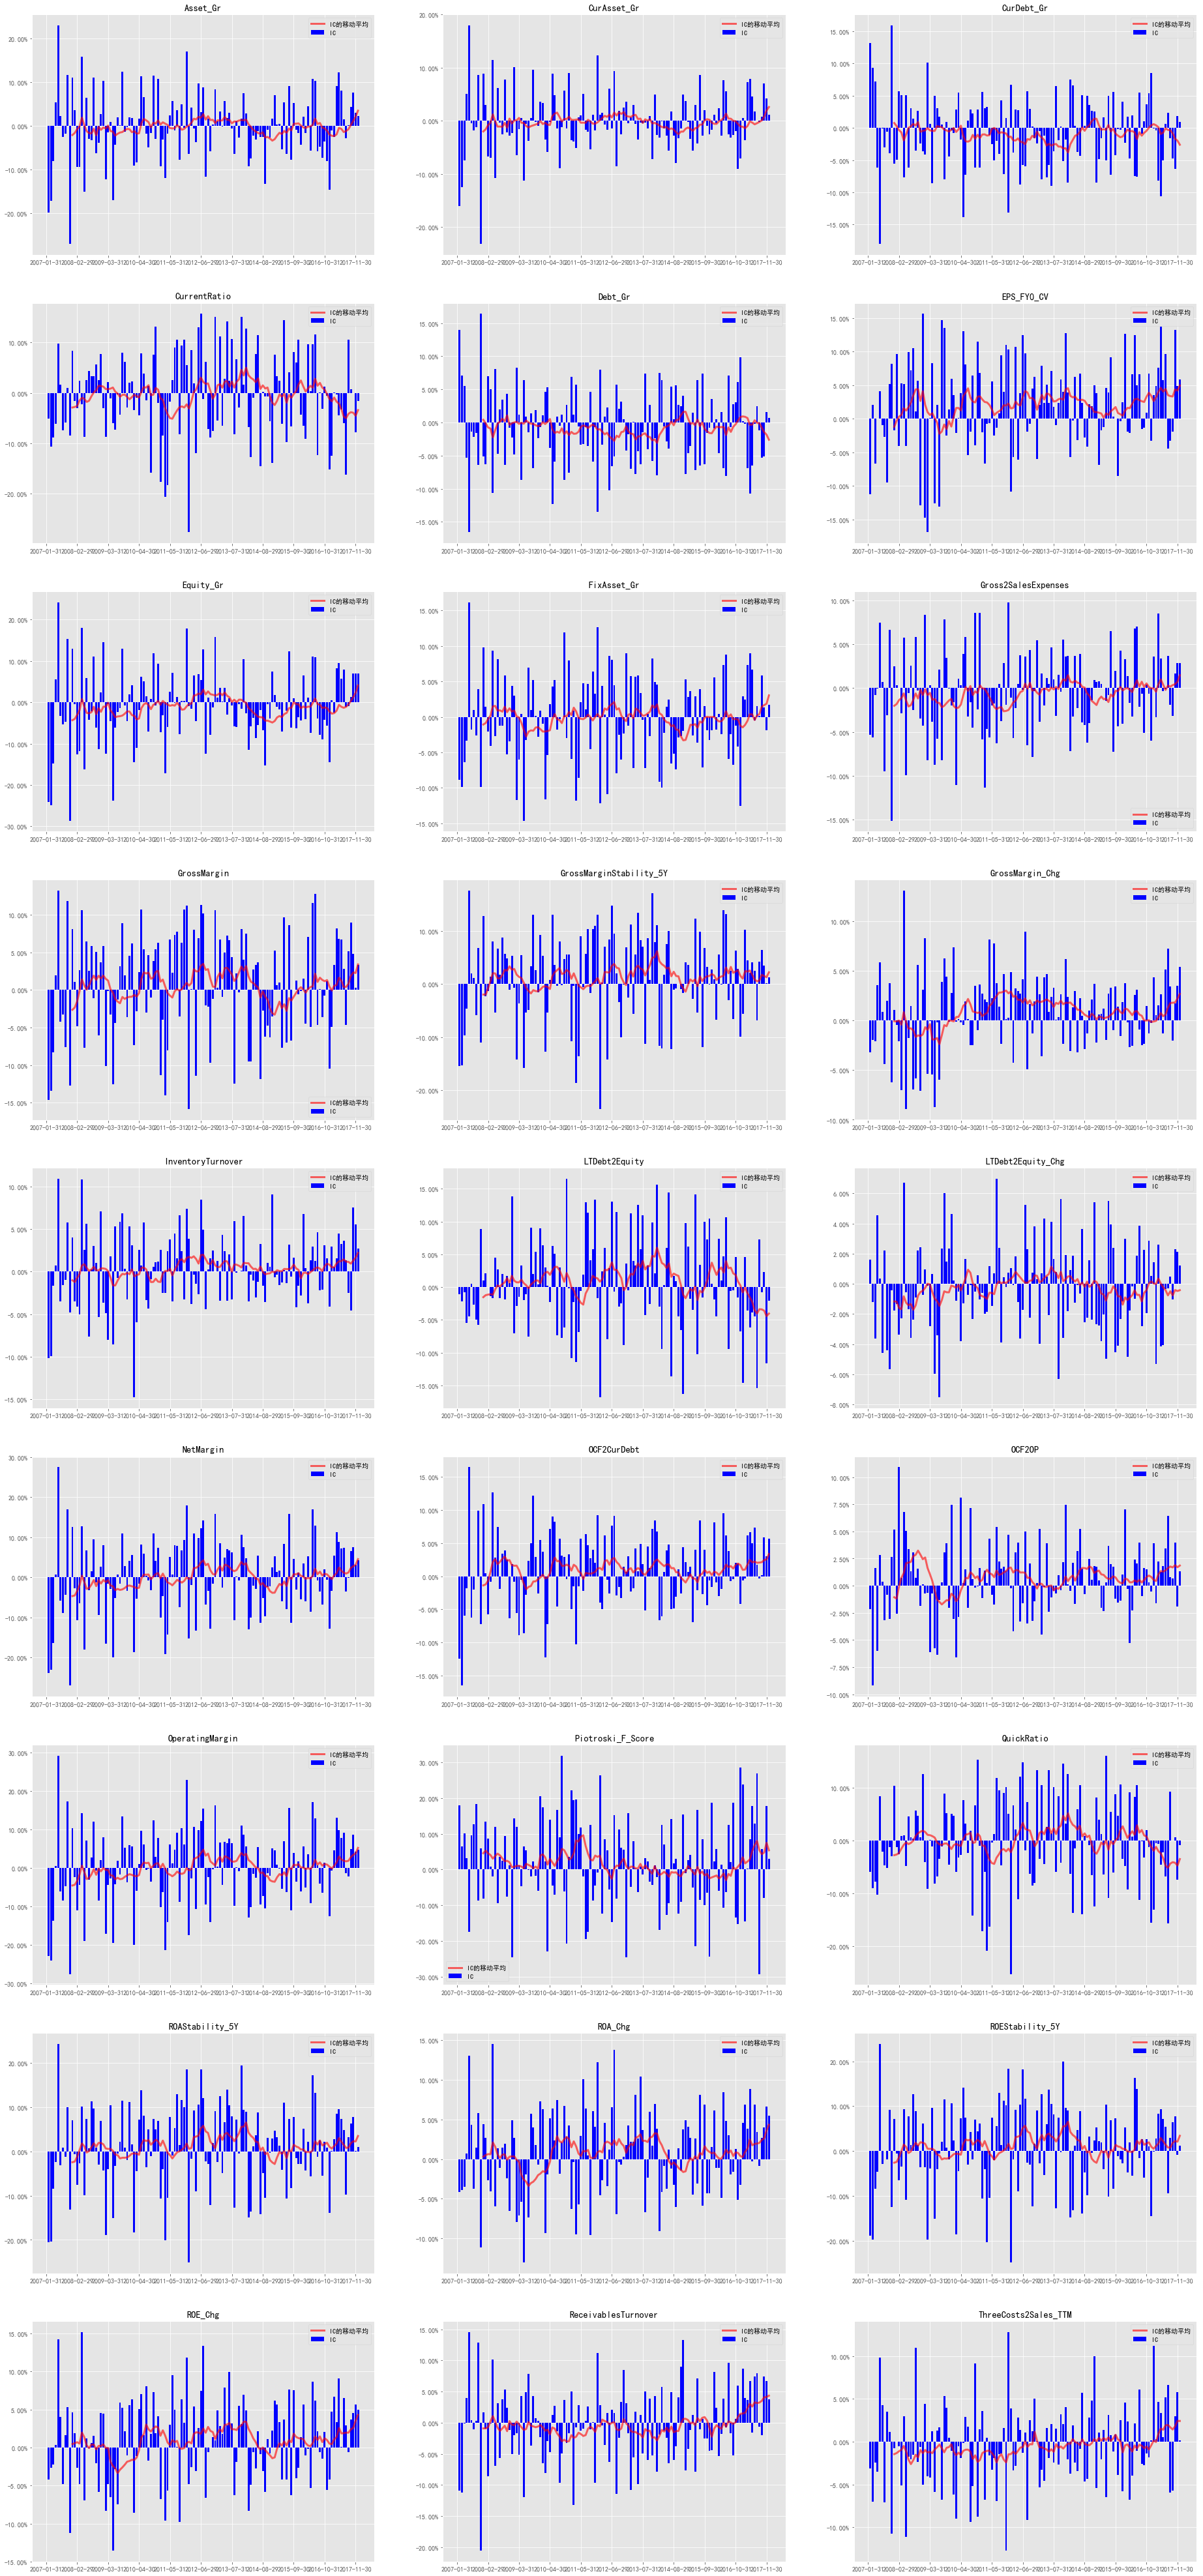

In [3]:
if __name__=='__main__':
    # 创建回测模型
    Model = QS.BackTest.BackTestModel()
    # --------因子测试模块--------
    # IC 测试
    iModule = QS.BackTest.SectionFactor.IC(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["排序方向"] = FactorInfo["排序方向"].loc[FactorNames].to_dict()
    iModule["价格因子"] = "复权收盘价"
    iModule["行业因子"] = "中信行业"
    iModule["计算时点"] = MonthLastDTs
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    
    # 运行模型
    TestDateTimes = MainFT.getDateTime()
    Model.run(dts=TestDateTimes)
    
    # 查看结果
    display(Model)